In [1]:
from triangulation import show_triangulation

In [181]:
cell.get_positions().size

192

In [170]:
def show_trangulation(file_path, title, points=[], project_down=3, display_zoom=2):
    """
    :project_down: the dimension where you look down.
    """
    if project_down == 3:
        indice = range(1, 3)
    elif project_down == 2:
        indice = [1, 3]
    elif project_down == 1:
        indice = [2, 3]
    
        
    r = Rotation.from_euler('x', 10, degrees=True)
    theta = np.radians(10)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((1, 0), (0, 1.1)))
    R_inv = R.inv
    
    if len(points) == 0:
        points = de_dup(pd.read_csv(file_path).to_numpy())[:, 1:]
        points = points[:, [i - 1 for i in indice]]
    else:
        points = de_dup(points)
        points = points[:, [i - 1 for i in indice]]

    
    points = points.dot(R)
    tri = Delaunay(points)
    points = points.dot(R_inv)
    plt.triplot(points[:,0], points[:,1], tri.simplices)
    fig = plt.gcf()
    w, h = fig.get_size_inches()
    fig.set_size_inches(w * display_zoom, h * display_zoom)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.plot(points[:,0], points[:,1], 'o')
   
    plt.title(title)
    plt.show()

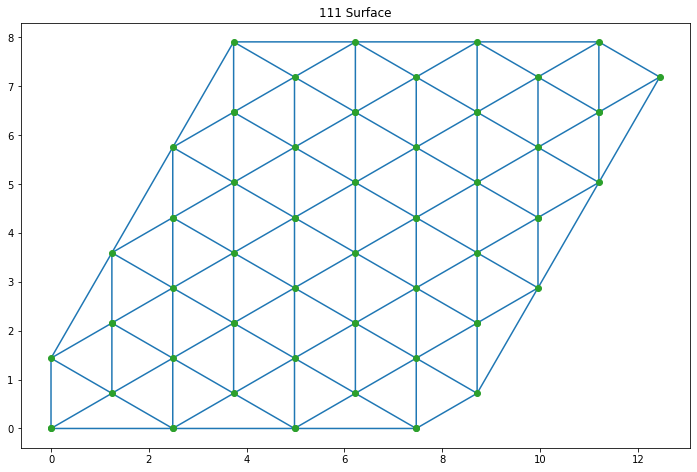

In [5]:
show_triangulation("poscar_files/POSCAR_Ni_111", title="111 Surface")

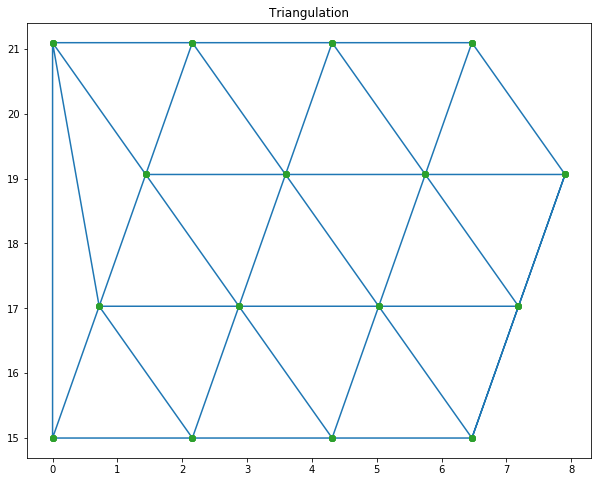

In [6]:
show_triangulation("poscar_files/POSCAR_Ni_111","111 Surface Side View", project_down="x")

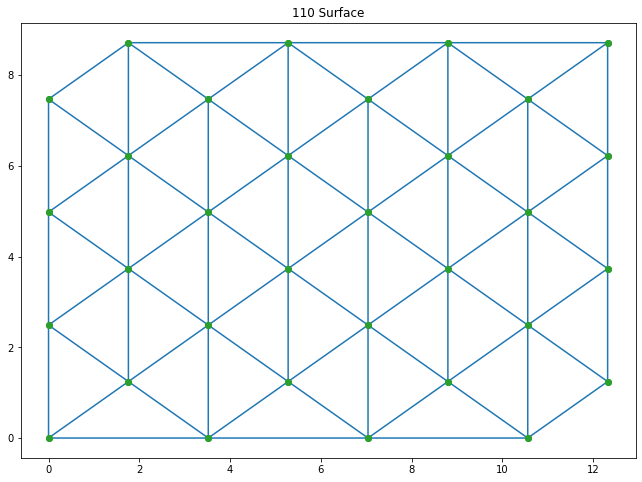

In [8]:
show_triangulation("poscar_files/POSCAR_Ni_110", title="110 Surface")

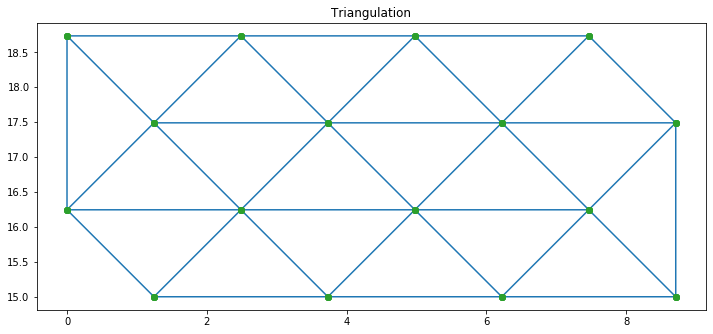

In [9]:
show_triangulation("poscar_files/POSCAR_Ni_110", "110 Surface Side View", project_down="x")

## Using Supercells

In [11]:
import ase

In [12]:
cell = ase.io.vasp.read_vasp("poscar_files/POSCAR_Ni_110")
super_cell = cell*(3,3,3)
# ase.io.vasp.write_vasp("POSCAR.4x4x4",cell*(4,4,4), label='444supercell',direct=True,sort=True)

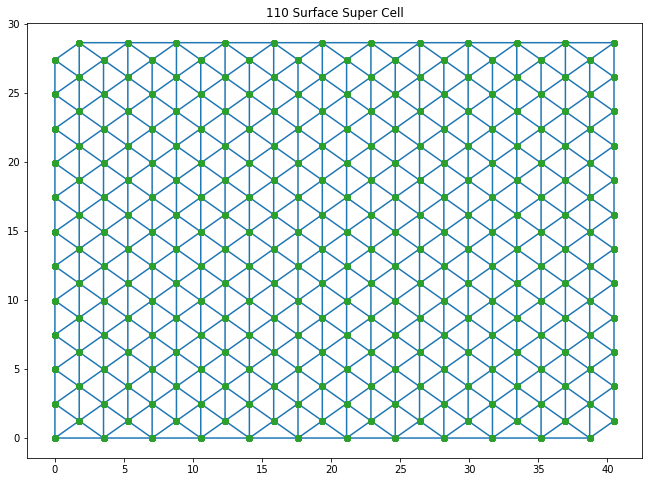

In [14]:
show_triangulation(points=super_cell.get_positions(), title="110 Surface Super Cell", project_down="z")

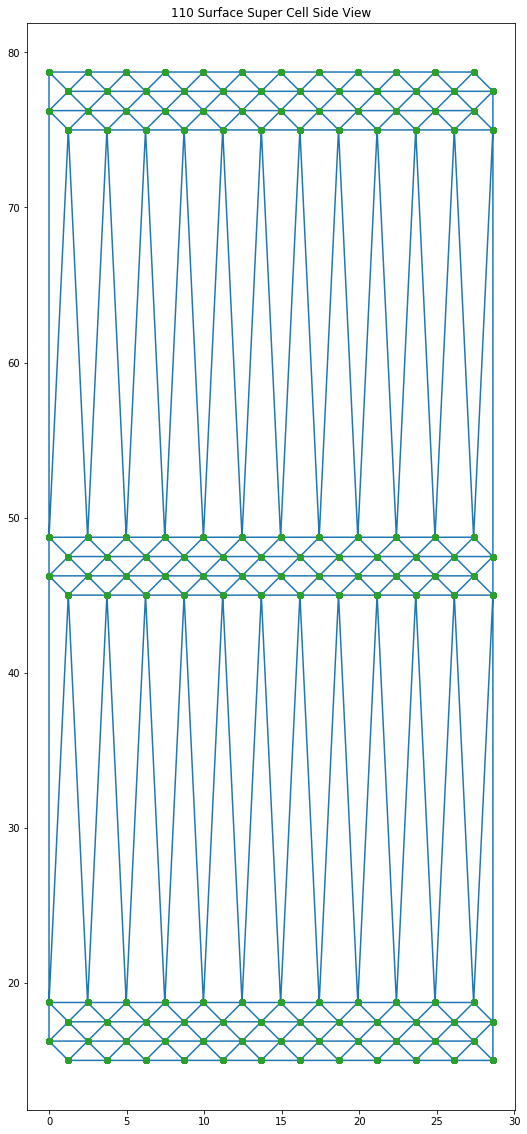

In [16]:
show_triangulation(points=super_cell.get_positions(), title="110 Surface Super Cell Side View", project_down="x", display_zoom=5)